In [98]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
from src.loaders import load_data, load_labels
from src.classify import MCM_Classifier
import os
import src.plot as myplot
import os
import json

import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore', 'use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.')


In [99]:
import importlib
import src.plot as myplot
importlib.reload(myplot)



<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/classifier/bin/../src/plot.py'>

In [3]:
samples_path = "../OUTPUT/sample_sizes"
mcms_fname = "MCMs_0.json"
counts_fname = "Counts_0.json"
n_samples = 5423

with open(os.path.join(samples_path,str(n_samples),"MCMs", mcms_fname), "r") as f:
        all_MCM = [np.array(i) for i in json.load(f)] 


with open(os.path.join(samples_path,str(n_samples),"Counts", counts_fname), "r") as f:
        C = json.load(f)

In [4]:
mcm_index = 3

In [5]:
n_variables = 121 #TODO This cell is not trash.
data_path = "../INPUT_all/data/"
data_filename_format = "train-images-unlabeled-{}.dat"

# # for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
# all_C_icc_3 = myplot.calculate_P_icc(C, all_MCM,3,n_variables, data_path,data_filename_format)
# np.save("../OUTPUT/sample_sizes/5423/all_C_icc_3.npy", all_C_icc_3)



In [6]:
all_C_icc_3 = np.load("../OUTPUT/sample_sizes/5423/all_C_icc_3.npy")

mcm3_comms_map = myplot.generate_icc_comms_map(all_MCM[3])
mcm5_comms_map = myplot.generate_icc_comms_map(all_MCM[5])

In [7]:
# Skip community structure calculation. #TODO This cell is not trash.

# scale = 2
# fig, axs  = plt.subplots(2,5,figsize=(12*scale,5*scale))
# axs = axs.flatten()
# for i, ax in enumerate(axs): 
#     comms = myplot.generate_icc_comms_map(all_MCM[i])
    # myplot.plot_communities(ax, comms, myplot.int_to_letters(comms),f"MCM {i}")
# # myplot.plot_communities(axs[1],mcm5_comms_map,"MCM 5")

# plt.tight_layout()
# plt.savefig("../figures/paper_comms.png",dpi=300, bbox_inches="tight")
# plt.close()

--------------------------

Scatter plot in how % correct vote for iccs (points) for seeing a 3 vs a 5

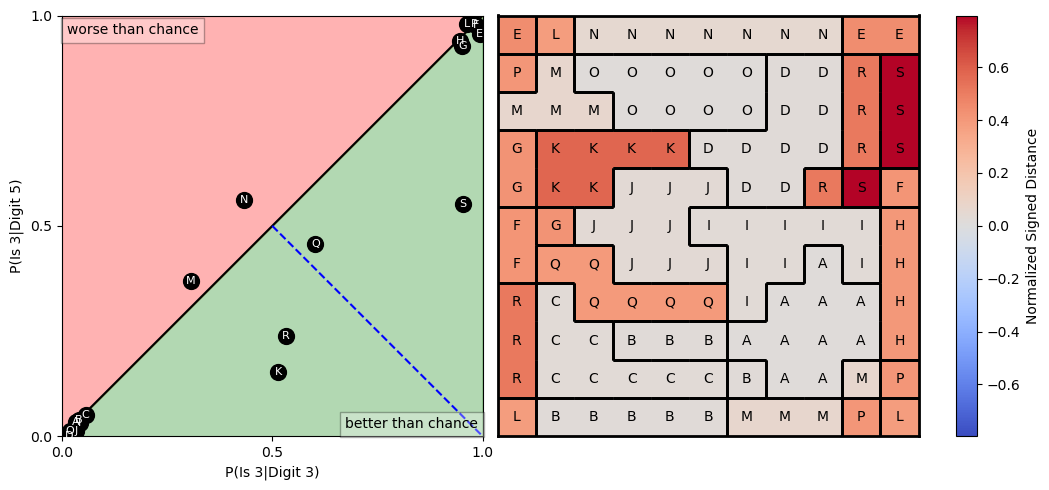

In [8]:
cat_a = 3
cat_b = 5
mcm_idx = 3

all_prob = all_C_icc_3/all_C_icc_3.shape[1] # for MCM 0
avg_prob = all_prob.mean(axis=1)

scale = 1
fig, axs  = plt.subplots(1,2,figsize=(12*scale,5*scale))
axs = axs.flatten()
axs[0].set_aspect('equal')
axs[0].set_xticks([0, 0.5, 1])
axs[0].set_yticks([0, 0.5, 1])
# axs[0].grid(True, linestyle='--', alpha=0.6)

# decision space
axs[0].plot([0, 1], [0, 1], color='black')
axs[0].fill_between([0, 1], [0, 1], 1, where=[True, True], color='red', alpha=0.3)
axs[0].fill_between([0, 1], [0, 1], 0, where=[True, True], color='green', alpha=0.3)


axs[0].plot([0.5, 1], [0.5, 0], color='blue', linestyle='--')


# plots
# axs[0].scatter(avg_prob[:, cat_a], avg_prob.max(axis=1), color="red", marker=".", label="worst digit") # extreme performnce
# axs[0].scatter(avg_prob[:, cat_a], avg_prob.min(axis=1), color="green", marker=".", label="best digit")



axs[0].scatter(avg_prob[:, cat_a], avg_prob[:, cat_b], color="black", marker="o", label=cat_b,s=130)


for i, (x, y) in enumerate(zip(avg_prob[:, cat_a], avg_prob[:, cat_b])):
    axs[0].text(x, y, myplot.int_to_letters(i), color="white", ha="center", va="center",fontsize=8)


# other stuff
axs[0].set_xlabel(f'P(Is {mcm_idx}|Digit {cat_a})')
axs[0].set_ylabel(f'P(Is {mcm_idx}|Digit {cat_b})')
# axs[0].set_title('Scatter Plot of state likelihoods for iccs in MCM 3')
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

axs[0].text(.012, .982, "worse than chance", ha='left', va='top', bbox=dict(facecolor='white',alpha=.3))
axs[0].text(.989, .012, "better than chance", ha='right', va='bottom', bbox=dict(facecolor='white',alpha=.3))
# axs[0].legend(bbox_to_anchor=(1, 1), loc='upper left')
# axs[0].legend(bbox_to_anchor=(.5, -0.2), loc='center', ncol=2)




# partition map for distances to decision bounary
plt.subplots_adjust(wspace=-.7)
x_coords, y_coords = zip(*[(x, y) for x, y in zip(avg_prob[:, cat_a], avg_prob[:, cat_b],)])
distances = np.array(x_coords) - np.array(y_coords) / np.sqrt(2) # signed distance
x0, y0 = 0, 1
max_dist = np.abs(x0 - y0) / np.sqrt(2)

axs[1].set_aspect('equal')
comms3 = myplot.generate_icc_comms_map(all_MCM[3])
dist_map = distances[comms3]/max_dist
im = myplot.partition_map(plt.gca(), dist_map,myplot.int_to_letters(comms3),myplot.find_borders(comms3), cbar=False)
plt.colorbar(im, ax=axs[1]).set_label('Normalized Signed Distance')
# plt.title("Normalized signed distance to decision boundary (3v5).", fontsize=11)
plt.tight_layout()  # Adjust subplot layout
plt.savefig("../figures/paper_decib_and_map.png")
# CLelia
# upper right pixels are outside of the image, most black. As we go down diagnaolly get more center. Lower lit, larger.
# remove color points
# 3 has been seen, 5 has not been seen -> 5 is test data, 3 is train data


# digt 3 test vs. train in axis. Can Digithow much bias there is from smoothening. Appendix. WHy choose alhs.

- add ROC, needs discrete votes but could add in text

## Probability distributions for informative vs. uninformative ICCs 
- (over samples for seeing 3 and seeing 5)
- 1x informative, 1x uninformative ICC


In [9]:
pdfs3 = all_C_icc_3[:,:,3]/all_C_icc_3.shape[1]
pdfs0 = all_C_icc_3[:,:,0]/all_C_icc_3.shape[1]

In [14]:
all_C_icc_3.shape

(19, 5423, 10)

In [89]:

# letters = ["K","R"] # also not that bad a choice
letters = ["K","Q"]


sel_icc = myplot.letters_to_int(letters)
pdfs_diff = (all_C_icc_3[sel_icc,:,3] - all_C_icc_3[sel_icc,:,5])/all_C_icc_3.shape[1]
pdfs3 = all_C_icc_3[sel_icc,:,3]/all_C_icc_3.shape[1]
pdfs5 = all_C_icc_3[sel_icc,:,5]/all_C_icc_3.shape[1]



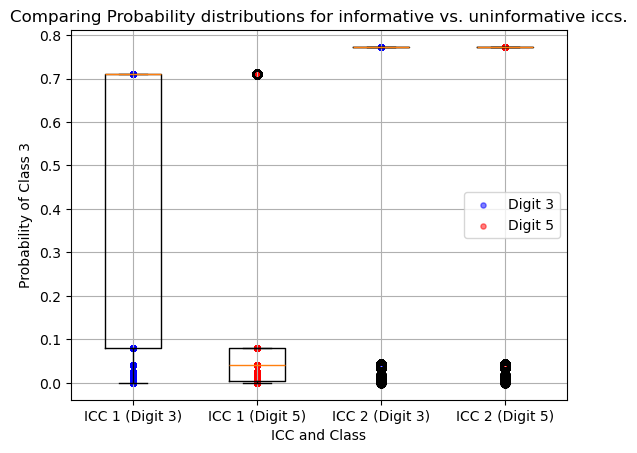

In [90]:
ICC1_prob_3_3 = pdfs3[0,:]
ICC1_prob_3_5 = pdfs5[0,:]
ICC2_prob_3_3 = pdfs3[-1,:]
ICC2_prob_3_5 = pdfs3[-1,:]

plt.scatter(x=[0]*len(ICC1_prob_3_3), y=ICC1_prob_3_3, c='blue', label='Digit 3', alpha=0.5,s = 14)
plt.scatter(x=[1]*len(ICC1_prob_3_3), y=ICC1_prob_3_5, c='red', alpha=0.5,s = 14)
plt.scatter(x=[2]*len(ICC2_prob_3_3), y=ICC2_prob_3_3, c='blue', alpha=0.5, s= 14)
plt.scatter(x=[3]*len(ICC1_prob_3_3), y=ICC2_prob_3_5, c='red', label='Digit 5', alpha=0.5, s= 14)
plt.boxplot([ICC1_prob_3_3, ICC1_prob_3_5, ICC2_prob_3_3, ICC2_prob_3_5], positions=[0, 1, 2, 3], showfliers=None)


plt.xlabel('ICC and Class')
plt.ylabel('Probability of Class 3')
plt.title('Comparing Probability distributions for informative vs. uninformative iccs.')
plt.xticks([0, 1, 2, 3], ['ICC 1 (Digit 3)', 'ICC 1 (Digit 5)', 'ICC 2 (Digit 3)', 'ICC 2 (Digit 5)'])
plt.legend()
plt.grid(True)
plt.show()


In [94]:
colors = ['#1f77b4', '#d62728']
cmap = sns.color_palette(colors)


 Maybe have this as 3rd plot in scatter thing. 
 Also, T>M>O>W by informativity here. 



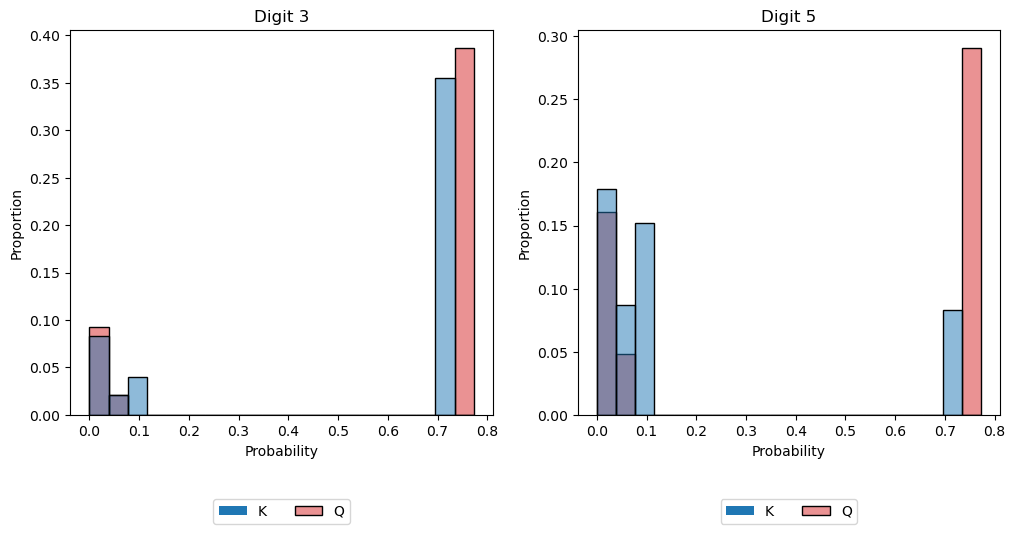

In [100]:
print("\n Maybe have this as 3rd plot in scatter thing. \n Also, T>M>O>W by informativity here. \n")

df3 = pd.DataFrame(pdfs3.T, columns=letters)
df5 = pd.DataFrame(pdfs5.T, columns=letters)
h = 5
ratio  = 1.2
fig, axs = plt.subplots(1, 2, figsize=(ratio*h*2, h))

sns.histplot(df3, ax=axs[0], palette=cmap, stat="proportion",bins=20)
sns.histplot(df5, ax=axs[1],palette=cmap,  stat="proportion",bins=20)
# sns.histplot(df5-df3, ax=axs[1],palette="husl",  stat="proportion",bins=20)  # T and W look the same


axs[0].set_title("Digit 3")
axs[0].set_xlabel("Probability")
axs[1].set_title("Digit 5")
axs[1].set_xlabel("Probability")

axs[0].legend(letters, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)
axs[1].legend(letters, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)

plt.show()
# TODO I want to show the shift in voting behaviour depending on what digit i show the icc
# TODO the size of the shift should be visible in the histogram
# TODO i do not get where the pink color comes from in the plot -> its the first color but wrong in the legend


# sns.displot(df, height=6, aspect=1.2, palette="husl",legend=False, kind="hist",stat="proportion")
# # sns.displot(df, height=6, aspect=1.2, palette="husl",legend=False, kind="kde")

# plt.xlabel("Probability")
# # plt.title("Probability distribution of selected ICCs")
# plt.legend(letters,bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)


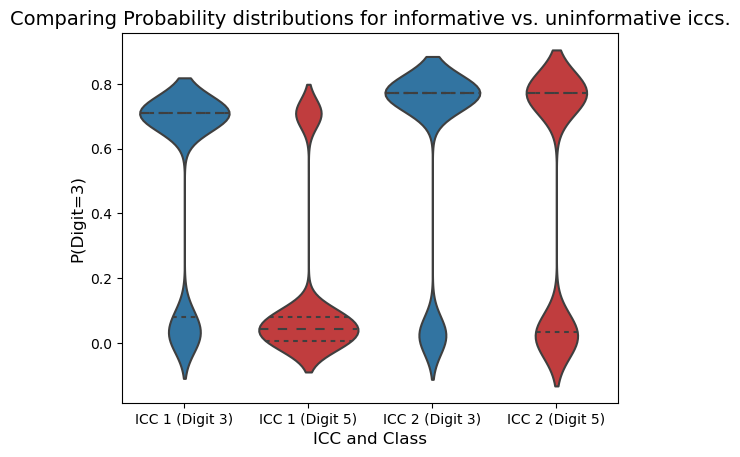

In [92]:
ICC1_prob_3_3 = pdfs3[0,:]
ICC1_prob_3_5 = pdfs5[0,:]
ICC2_prob_3_3 = pdfs3[-1,:]
ICC2_prob_3_5 = pdfs5[-1,:]

df = pd.DataFrame({
    'ICC and Class': np.repeat(['ICC 1 (Digit 3)', 'ICC 1 (Digit 5)', 'ICC 2 (Digit 3)', 'ICC 2 (Digit 5)'], len(ICC1_prob_3_3)),
    'P(Digit=3)': np.concatenate([ICC1_prob_3_3, ICC1_prob_3_5, ICC2_prob_3_3, ICC2_prob_3_5])
})



sns.violinplot(x='ICC and Class', y='P(Digit=3)', data=df, palette=cmap, inner='quartile', alpha=0.5)


plt.xlabel('ICC and Class', fontsize=12)
plt.ylabel('P(Digit=3)', fontsize=12)
plt.title('Comparing Probability distributions for informative vs. uninformative iccs.', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



## Bias from smoothing.

In [ ]:
# generate test counts
n_variables = 121
test_data_path = "../INPUT_all/data/testdata_separated"
test_data_filename_format = "test-images-unlabeled-{}.dat"
test_all_C_icc_3 = myplot.calculate_P_icc(C, all_MCM,3,n_variables, test_data_path,test_data_filename_format)
all_C_icc_3.shape

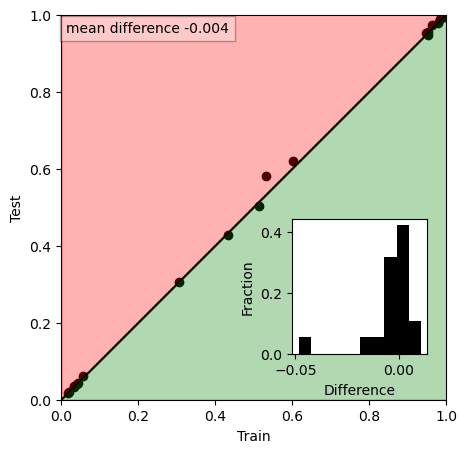

In [ ]:
### Bias from smoothing. P(Is 3| Digit 3 Test) vs. P(Is 3| Digit 3 Train)

mcm_idx = 3
digit = 3
count = all_C_icc_3.shape[1] # since get counts, need to devide by max nr of count possible for both test and train data

# train data
all_prob = all_C_icc_3/count # for MCM 0
avg_prob = all_prob.mean(axis=1)
avg_train = avg_prob[:, digit]
# test data
test_all_prob = test_all_C_icc_3/count # for MCM 0
test_avg_prob = test_all_prob.mean(axis=1)
avg_test = test_avg_prob[:, digit]



scale = 1
fig, axs  = plt.subplots(1,1,figsize=(12*scale,5*scale))
axs = [axs]

# axs[0].grid(True, linestyle='--', alpha=0.6)

axs[0].scatter(avg_train, avg_test, color="black", marker="o")

# for i, (x, y) in enumerate(zip(avg_prob[:, cat_a], avg_prob[:, cat_b])):
#     axs[0].text(x, y, myplot.int_to_letters(i), color="white", ha="center", va="center",fontsize=8)


# other stuff
axs[0].plot([0, 1], [0, 1], color='black')
# axs[0].plot([0.5, 1], [0.5, 0], color='blue', linestyle='--')
axs[0].fill_between([0, 1], [0, 1], 1, where=[True, True], color='red', alpha=0.3)
axs[0].fill_between([0, 1], [0, 1], 0, where=[True, True], color='green', alpha=0.3)
# axs[0].text(.012, .982, "worse than chance", ha='left', va='top', bbox=dict(facecolor='white',alpha=.3))
axs[0].text(.012, .982, f"mean difference {np.mean(avg_train - avg_test).round(3)}", ha='left', va='top', bbox=dict(facecolor='white',alpha=.3))

axs[0].set_xlabel(f"Train")
axs[0].set_ylabel(f"Test")
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].set_aspect('equal')




ax_hist = axs[0].inset_axes([0.6, 0.12, 0.35, 0.35])  # Adjust the position and size as needed
ax_hist.hist((avg_train - avg_test), color="black", weights=np.ones(len(avg_test)) / len(avg_test))
ax_hist.set_xlabel('Difference')
ax_hist.set_ylabel("Fraction")

# ax_hist.set_yticks([0.1, .2,.3, .4])
ax_hist.set_xticks(np.round([-0.05, 0], 2))


plt.show()

---------

Normalised distance to decision boundary comparing MCM 3 for seeing a 3 vs. seeing anything else (average)

Higher = more discriminatory 


Text(0.5, 1.0, 'Normalized signed distance to decision boundary (Seeing 3 vs Other) in procent.')

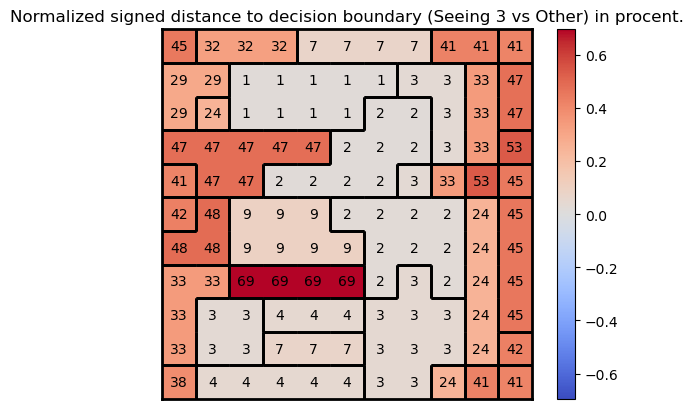

In [ ]:
x_coords, y_coords = zip(*[(x, y) for x, y in zip(avg_prob[:, cat_a], avg_prob.mean(axis=1))])
distances = np.array(x_coords) - np.array(y_coords) / np.sqrt(2)
x0, y0 = 0, 1
max_dist = np.abs(x0 - y0) / np.sqrt(2)


print("Higher = more discriminatory ")
comms3 = myplot.generate_icc_comms_map(all_MCM[3])
dist_map = distances[comms3]/max_dist
plt.figure()
myplot.partition_map(plt.gca(), dist_map,(dist_map*100).astype(int),myplot.find_borders(comms3))

plt.title("Normalized signed distance to decision boundary (Seeing 3 vs Other) in procent.")

In [ ]:
avg_prob = all_prob.mean(axis=1)
avg_prob.shape

(25, 10)

In [ ]:
raise KeyboardInterrupt


KeyboardInterrupt



--------------------

In [ ]:
# # make test data into seperate folder for this so the format matches the train data format
# data_path = "../INPUT_all/data/"

# data_filename_format = "test-images-unlabeled-{}.dat"

# test_data = np.loadtxt(data_path + "test-images-unlabeled-all-uniform.txt", dtype=str)
# test_labels = np.loadtxt(data_path + "test-labels-uniform.txt")

# for i in range(10):
#     cls = test_data[np.where(test_labels ==i)[0]]
#     np.savetxt(os.path.join(data_path,"testdata_separated",data_filename_format.format(i)), cls, delimiter="\n", fmt="%s")


In [ ]:

# pdfs3 = all_C_icc_3[:,:,3]/all_C_icc_3.shape[1]
# pdfs0 = all_C_icc_3[:,:,0]/all_C_icc_3.shape[1]


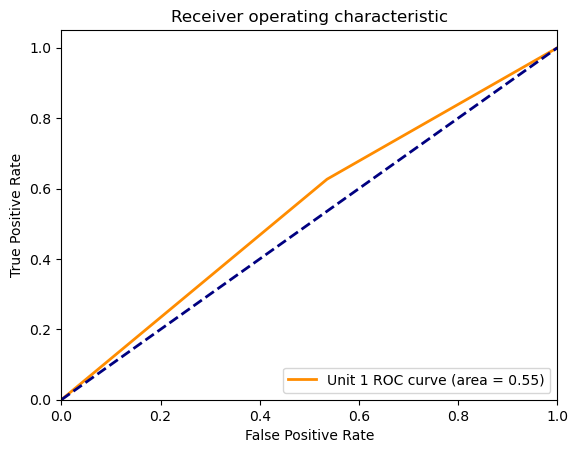

In [ ]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt
# import numpy as np

# print("average ROC curve independ")
# # Flatten the arrays and create predictions and labels
# pred1 = np.concatenate([pdfs3.flatten() > .5, pdfs0.flatten() < .5])
# lab1 = np.repeat([1, 0], len(pdfs3.flatten()))  # Repeat for each instance in the flattened array

# # Compute ROC curve and ROC area for each class
# fpr1, tpr1, _ = roc_curve(lab1, pred1)
# roc_auc1 = auc(fpr1, tpr1)

# # Plot ROC curve
# plt.figure()
# lw = 2
# plt.plot(fpr1, tpr1, color='darkorange', lw=lw, label='ICC 1 ROC curve (area = %0.2f)' % roc_auc1)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()

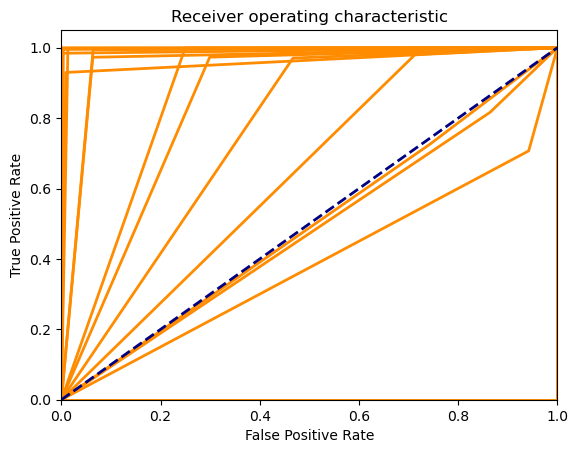

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.figure()


for i in range(23):
    pred1 = np.concatenate([pdfs3[i,:] > .5,pdfs0[i,:] <.5])
    lab1 = np.repeat([1,0],5423)

    # pred2 = np.concatenate([pdfs0[i,:] > .5,pdfs0[i,:] <.5])
    # lab2 = np.repeat([1,0],5423)

    # Compute ROC curve and ROC area for each class
    fpr1, tpr1, _ = roc_curve(lab1,pred1)
    roc_auc1 = auc(fpr1, tpr1)

    # fpr2, tpr2, _ = roc_curve(lab2,pred2)
    # roc_auc2 = auc(fpr2, tpr2)


    lw = 2
    plt.plot(fpr1, tpr1, color='darkorange',
            lw=lw, label='ICC 1 ROC curve (area = %0.2f)' % roc_auc1)
    # plt.plot(fpr2, tpr2, color='darkgreen',
    #         lw=lw, label='ICC 2 ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
plt.show()